<span style="font-family: Verdana; font-weight:bold;font-size:1.3em;color:#B22222;"> Ensemble Techniques Project for Texas University
    
<span style="font-family: Verdana; font-weight:bold;font-size:1.0em;color:#4682B4;"> Machine Learning and Artificial Intelligence Course
    
<span style="font-family: Verdana;font-size:0.9em;color:#4682B4;"> RAFAEL SOARES DE CARVALHO

<span style="font-family: Verdana; font-weight:bold; font-size:1.2em;color:#B22222;">  Objectives: 

Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<span style="font-family: Verdana;font-size:1.2em;color:#B22222;">  Deliverable 1 - Exploratory data quality report reflecting the following:
    
<span style="font-family: Verdana;font-size:0.9em;color:#4682B4;"> 1. Univariate analysis
    
<span style="font-family: Verdana;font-size:0.9em;color:#4682B4;"> 2. Multivariate analysis

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 1 - Exploratory Data Quality Report - UNIVARIATE ANALYSIS

In [1]:
#Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np   

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score,roc_curve

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

import statsmodels.api as sm

import pandas as pd    

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns

import scipy.stats as stats

from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
from os import system



# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format
#pip install graphviz



In [2]:
#Import Dataset
# https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
bank_original = pd.read_csv("bank-full.csv")  # data as it is - to check consistency
bank = pd.read_csv("bank-full.csv") # data to be manipulated

In [3]:
#Check import consistency
bank.shape
#Review: Import Validated 4,5k regs and 17 information collumns

(45211, 17)

In [4]:
#top10 view
bank.head()
#top 10 rows for data exploration

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
#Check Data Types
bank.dtypes

# No need to change types

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
#Statistical information and summary
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,"45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00"
mean,40.94,"1,362.27",15.81,258.16,2.76,40.20,0.58
std,10.62,"3,044.77",8.32,257.53,3.10,100.13,2.30
min,18.00,"-8,019.00",1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,"1,428.00",21.00,319.00,3.00,-1.00,0.00
max,95.00,"102,127.00",31.00,"4,918.00",63.00,871.00,275.00


In [7]:
#Check Data Infos
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
#Check Duplicated Rows
dup = bank.duplicated()
sum(dup)
#Review: no duplicated lines

0

In [9]:
#Check for Nulls
nulls = bank.isnull().any()
nulls
#Review: no missing values
#bank_adj.isnull().sum()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

In [10]:
#IQR from each collumm
bank.quantile(0.75) - bank.quantile(0.25) 

age           15.00
balance    1,356.00
day           13.00
duration     216.00
campaign       2.00
pdays          0.00
previous       0.00
dtype: float64

In [11]:
#Standard Deviation
print(bank.std())

age           10.62
balance    3,044.77
day            8.32
duration     257.53
campaign       3.10
pdays        100.13
previous       2.30
dtype: float64


In [12]:
#Covariance
cov_bank = (bank.cov())
cov_bank

,age,balance,day,duration,campaign,pdays,previous
age,112.76,"3,161.48",-0.81,-12.71,0.16,-25.26,0.03
balance,"3,161.48","9,270,598.95",114.10,"16,905.75",-137.51,"1,047.32",116.94
day,-0.81,114.10,69.26,-64.74,4.19,-77.54,-0.99
duration,-12.71,"16,905.75",-64.74,"66,320.57",-67.47,-40.35,0.71
campaign,0.16,-137.51,4.19,-67.47,9.60,-27.49,-0.23
pdays,-25.26,"1,047.32",-77.54,-40.35,-27.49,"10,025.77",104.90
previous,0.03,116.94,-0.99,0.71,-0.23,104.90,5.31


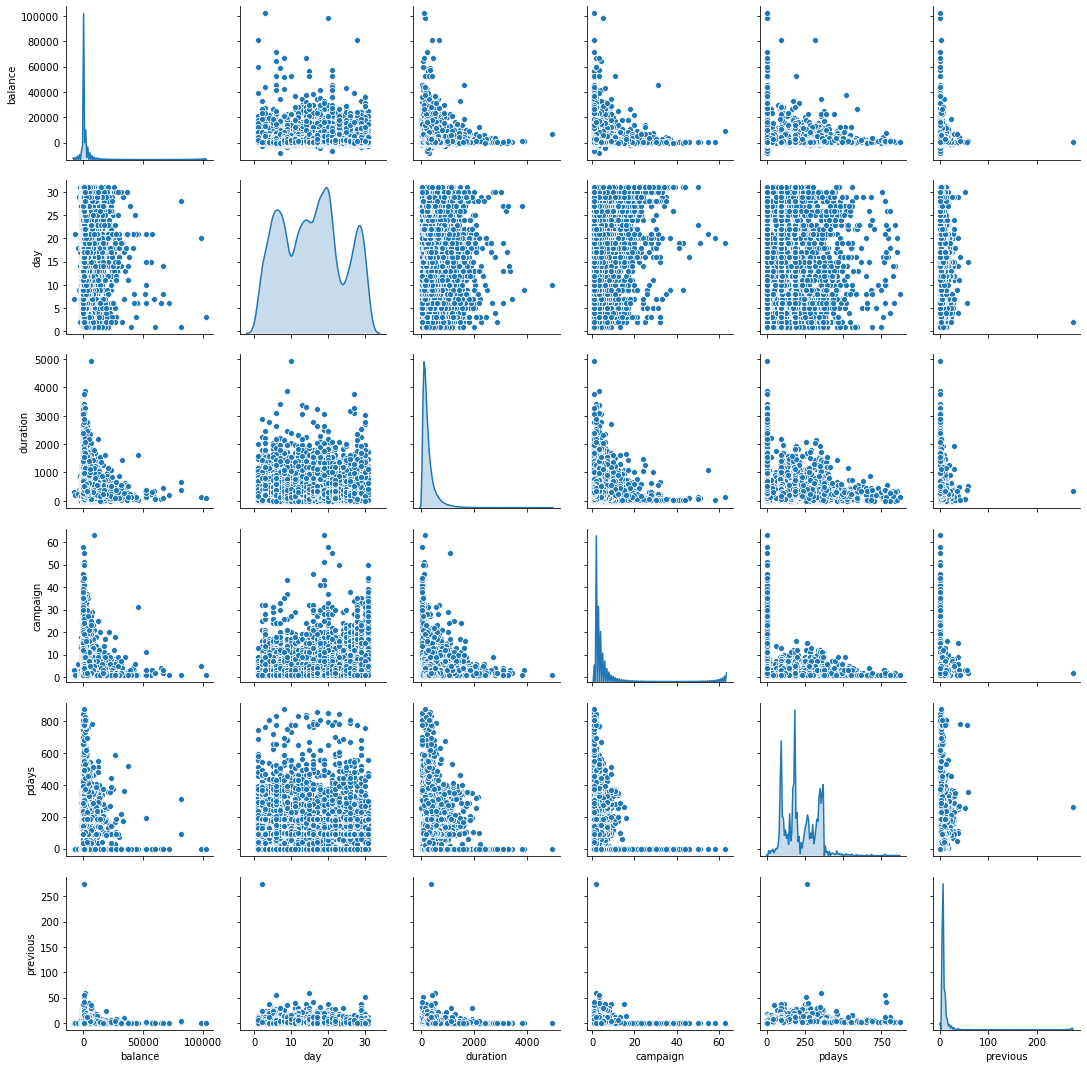

In [13]:
bank_attr = bank.iloc[:, 1:17]
sns.pairplot(bank_attr, diag_kind='kde')

In [14]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


In [15]:
#skewness of data
bank.skew()

age         0.68
balance     8.36
day         0.09
duration    3.14
campaign    4.90
pdays       2.62
previous   41.85
dtype: float64

In [16]:
#> One on One collum analyses <

#      Column     Non-Null Count  Dtype 
# ---  ------     --------------  ----- 
#  0   age        45211 non-null  int64 - 
#  1   job        45211 non-null  object - 
#  2   marital    45211 non-null  object -
#  3   education  45211 non-null  object - 
#  4   default    45211 non-null  object - 
#  5   balance    45211 non-null  int64 - 
#  6   housing    45211 non-null  object - 
#  7   loan       45211 non-null  object - 
#  8   contact    45211 non-null  object
#  9   day        45211 non-null  int64 
#  10  month      45211 non-null  object
#  11  duration   45211 non-null  int64 
#  12  campaign   45211 non-null  int64 
#  13  pdays      45211 non-null  int64 
#  14  previous   45211 non-null  int64 
#  15  poutcome   45211 non-null  object
#  16  Target     45211 non-null  object



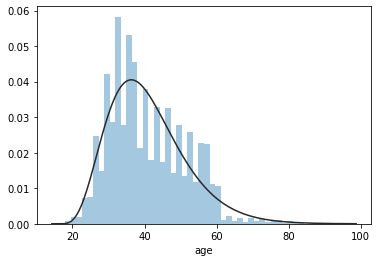

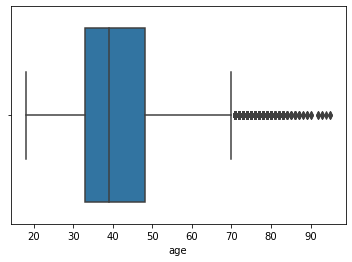

In [17]:
sns.distplot(bank['age'],fit=stats.gamma,kde=False)
plt.show()
sns.boxplot(bank['age'])
plt.show()

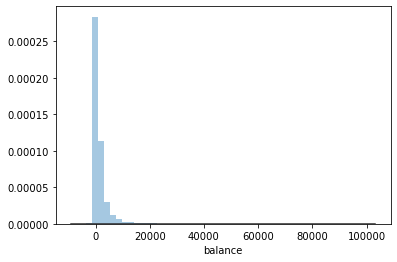

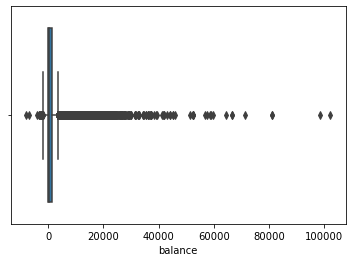

In [18]:
sns.distplot(bank['balance'],fit=stats.gamma,kde=False)
plt.show()
sns.boxplot(bank['balance'])
plt.show()

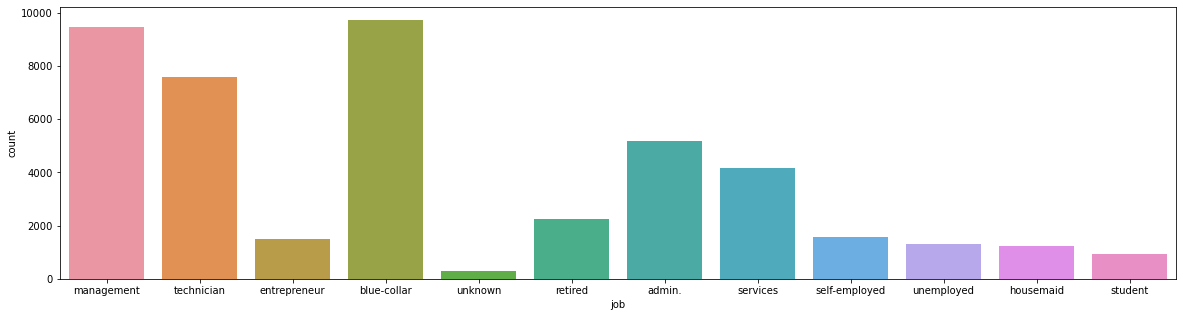

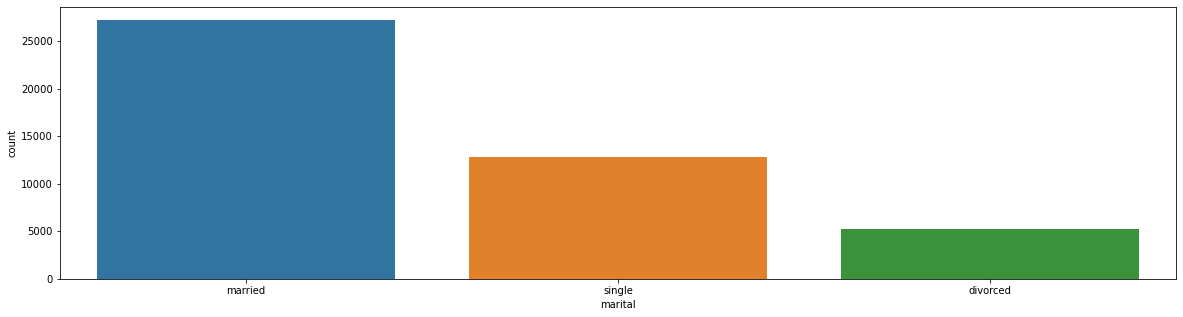

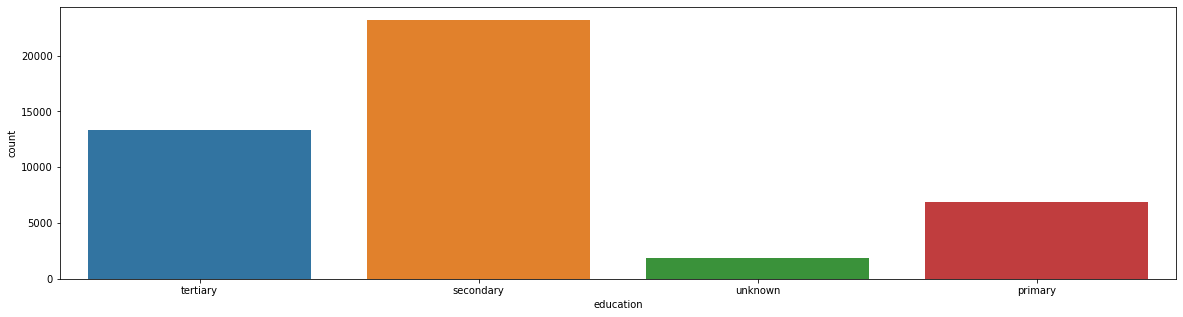

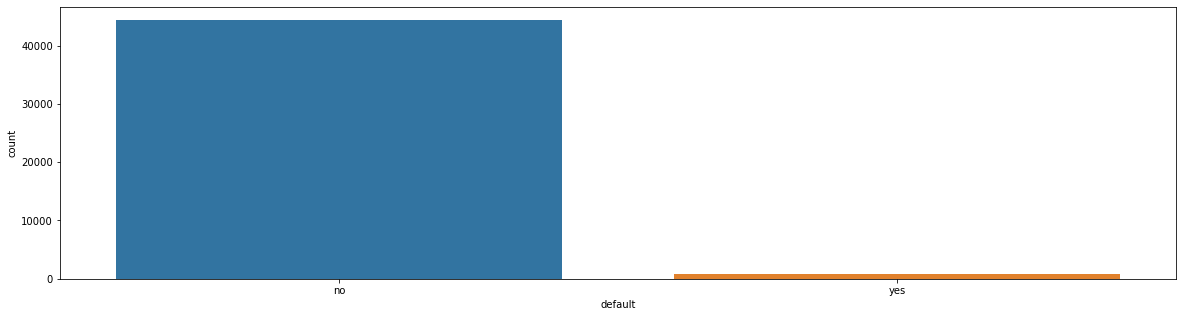

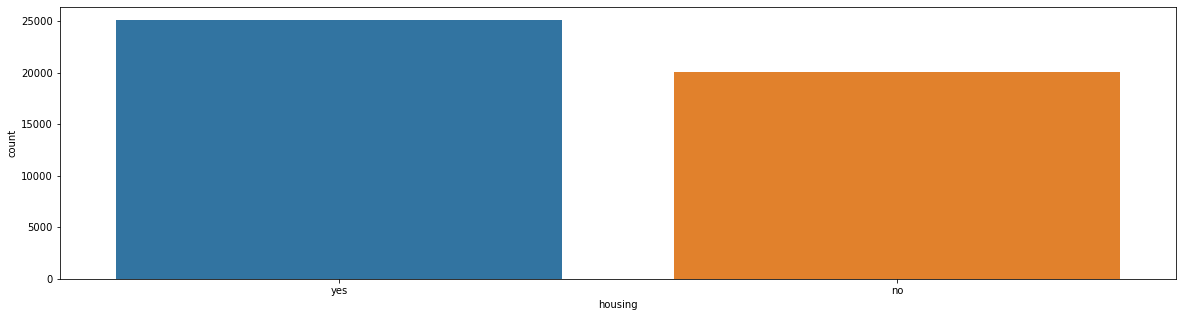

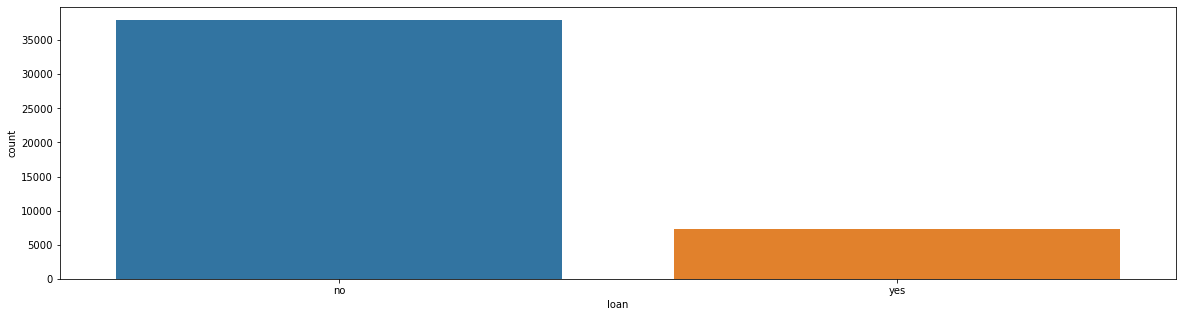

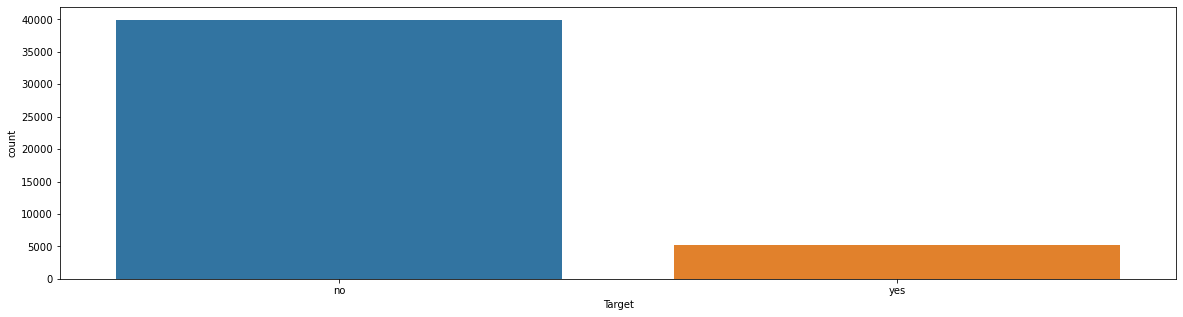

In [19]:
# Categorical Variables
Cat_Vars = ['job','marital','education','default','housing','loan','Target']

# Countplot
for x, y in enumerate(Cat_Vars):
    plt.figure(figsize=(20,5))
    sns.countplot(bank[y])
    plt.show()

<span style="font-family: Verdana;font-size:1.2em;color:#B22222;">  RESUME - Data Analysis and insights :

In [20]:
# Bank client data dictionary

#  age (numeric)
#  job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
#  marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
#  education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
#  default: has credit in default? (categorical: 'no','yes','unknown')
#  housing: has housing loan? (categorical: 'no','yes','unknown')
#  loan: has personal loan? (categorical: 'no','yes','unknown')
    
#  related with the last contact of the current campaign:

#  contact: contact communication type (categorical: 'cellular','telephone')
#  month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
#  day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
#  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#  other attributes:

#  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#  previous: number of contacts performed before this campaign and for this client (numeric)
#  poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# Not described on UCI

# Balance - seems to be the actual balance of customer
# Target - result to be predicted


<span style="font-family: Verdana;font-size:1.2em;color:#B22222;">  Data Analysis (numerical data) - 1of2:
    
####  Age:
    - Mean 41 years
    - STD 10.62
    - from 18 to 95 years
    - IQR - 15 (33 to 48 years)
    - There is no Nulls or Duplicated values
    - Moderately skewed = 0.68
    - Outliers when age > 70

####  Balance:
    - Mean 1,362.27
    - STD 3,044
    - from -8k  to 102k 
    - IQR - 15 (72 to 1428 years)
    - There is no Nulls or Duplicated values
    - Lot of near zero value
    - not skewed = 8.36
    - Many Outliers with righ range of data
    - Problably Need to adjust and classification
    
####  Other informations - about the campaign (phone calls informations):
    - Day: its the day of week of last contact
    - Duration: its the last contact call duration
    - Pdays: number of days that passed by after the client was last contacted from a previous campaign
    - Previous: number of contacts performed before this campaign and for this client

<span style="font-family: Verdana;font-size:1.2em;color:#B22222;">  Data Analysis (Categorical data) 2of2:
    
####  Job:
    - job information may have some grouping opportunities(need to check the target and results) as:
        - without monthly sallary - student, housemaid, unkown, unemployed
        - low range sallaries - blue collar, techninician, services, self-employed, retired
        - high range sllaries - entrepreneneur, management, admin

    
####  Education
    - May have a treat for "Unkown" to set as "Secundary" as if mode of data.
   
####  Marital, Default, Housing, Loan, Target:
    - normalized data


### 2 - Exploratory Data Quality Report - BIVARIATE ANALYSIS

<span style="font-family: Verdana;font-size:1em;color:#E41414;"> ANALYSIS before the graphs,  in this standard of information.

In [21]:
# Check "on Target" or "not" by variable

In [22]:
#Create a collum with numbers for target to use calculations easily

bank['TargetNum'] = bank.Target
bank['TargetNum'] = bank['TargetNum'].replace({'no': 0, 'yes': 1})
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
TargetNum     int64
dtype: object

<span style="font-family: Verdana;font-size:1em;color:#E41414;"> ANALYSIS: Below we can see that there is more 'YES' than 'No' on target from old customers (%), as the orange bar (yes for target) do not decrease as the blue one :

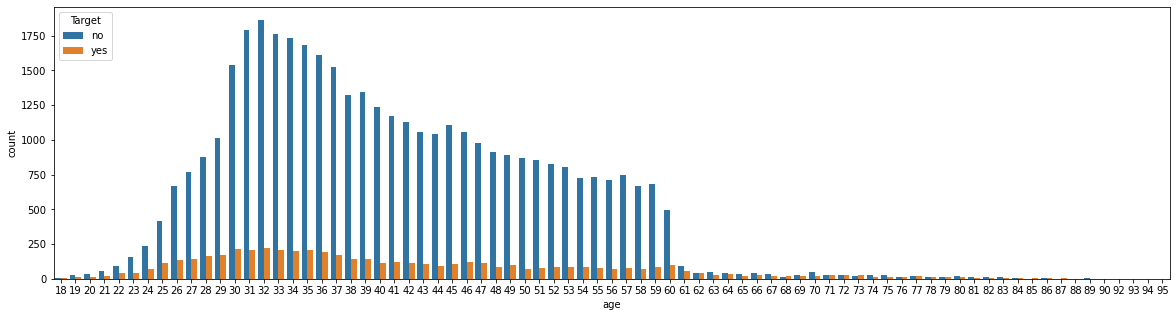

In [23]:
plt.figure(figsize=(20,5))
sns.countplot(bank['age'], hue=bank['Target']);
plt.show()

<span style="font-family: Verdana;font-size:1em;color:#E41414;"> ANALYSIS: We can see below that there is more 'YES' than 'No' on target from single customers(%) compared to the others marital states:

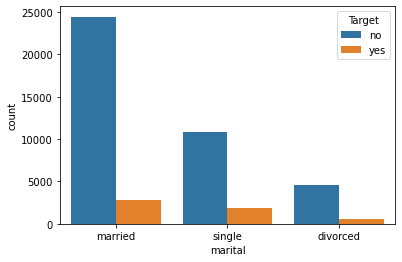

In [24]:
sns.countplot(bank['marital'], hue=bank['Target']);
plt.show()

<span style="font-family: Verdana;font-size:1em;color:#E41414;"> ANALYSIS: We can see below that,using both Graph and Table Analysis:
    - There is more 'YES' than 'No' on target from retired and students customers (%)
    - There is more 'NO' than 'YES' on target from housemaid/ blue-collar/entrepreneur/services customers (%)
    
    

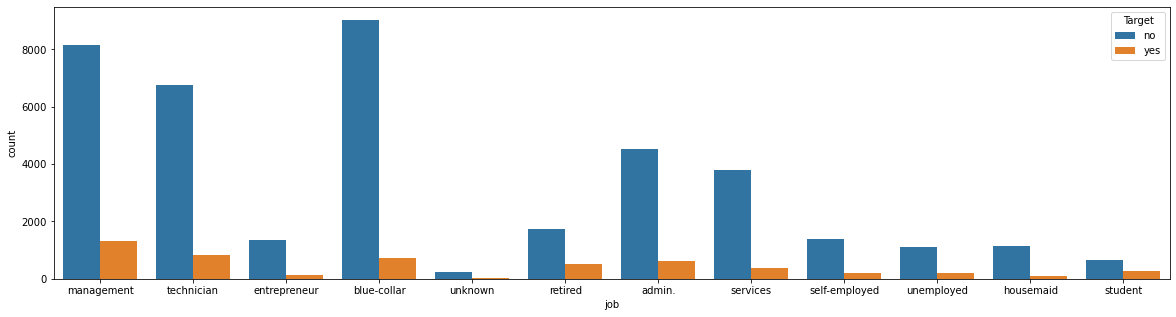

In [25]:
plt.figure(figsize=(20,5))
sns.countplot(bank['job'], hue=bank['Target']);
plt.show();

In [26]:
print(pd.pivot_table(bank,index=["job"],values=["TargetNum"]));


               TargetNum
job                     
admin.              0.12
blue-collar         0.07
entrepreneur        0.08
housemaid           0.09
management          0.14
retired             0.23
self-employed       0.12
services            0.09
student             0.29
technician          0.11
unemployed          0.16
unknown             0.12


<span style="font-family: Verdana;font-size:1em;color:#E41414;"> ANALYSIS: There is more target = yes (%) when the balance increases
    

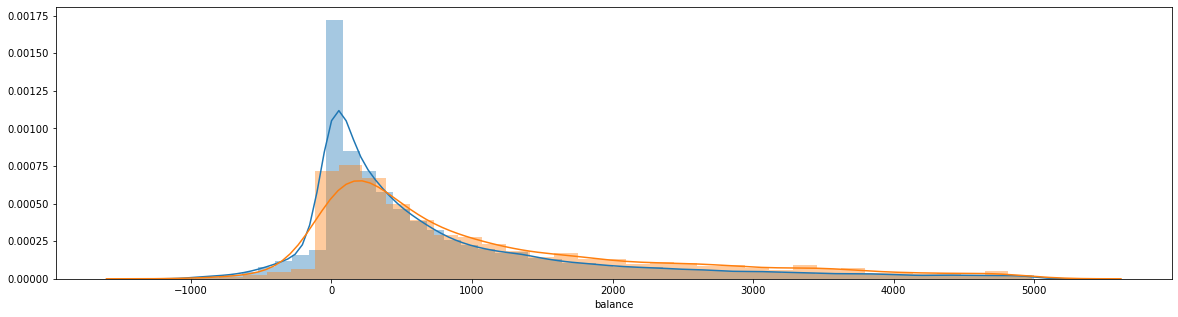

Target = No


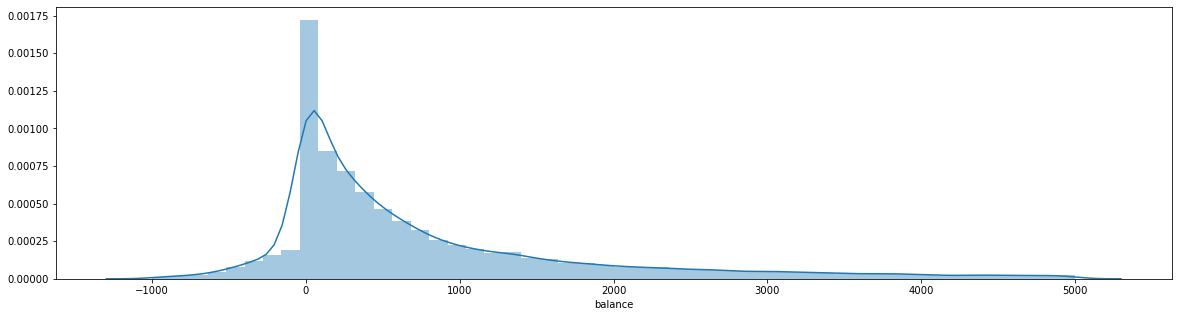

Target = Yes


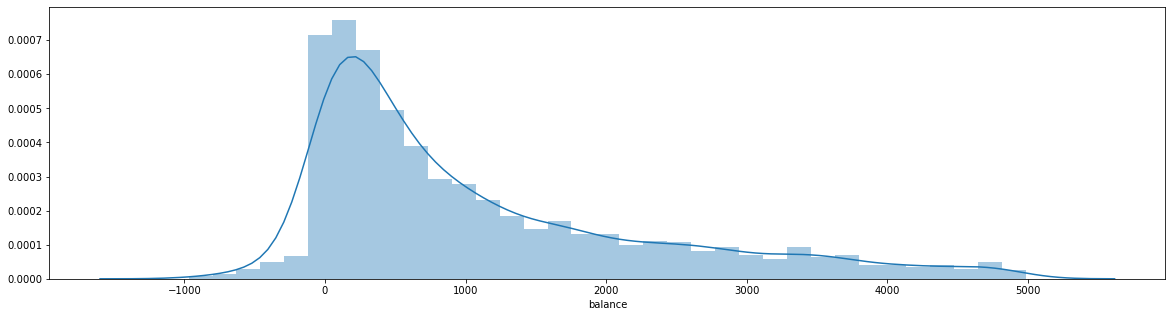

In [27]:
#limited values to show graph as well
x = bank.loc[(bank['TargetNum'] == 0) & (bank['balance'] <= 5000)& (bank['balance'] > -1000)]
y = bank.loc[(bank['TargetNum'] == 1) & (bank['balance'] <= 5000)& (bank['balance'] > -1000)]

#integrated graph
plt.figure(figsize=(20,5))
sns.distplot(x['balance'])
sns.distplot(y['balance'])
plt.show()

#Target = NO graph
plt.figure(figsize=(20,5))
sns.distplot(x['balance'])
print('Target = No')
plt.show()

#Target = YES graph
print('Target = Yes')
plt.figure(figsize=(20,5))
sns.distplot(y['balance'])
plt.show()


<span style="font-family: Verdana;font-size:1em;color:#E41414;"> ANALYSIS: 
Customers with: "no Default", "no Housing" and "no Loan" has more YES to target

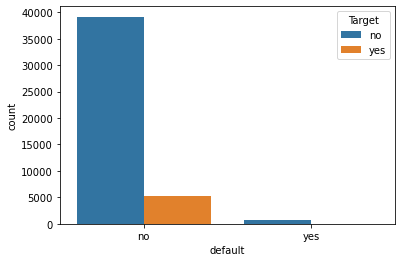

         TargetNum
default           
no            0.12
yes           0.06


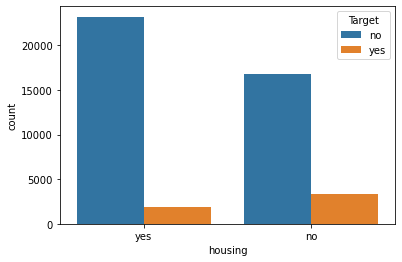

         TargetNum
housing           
no            0.17
yes           0.08


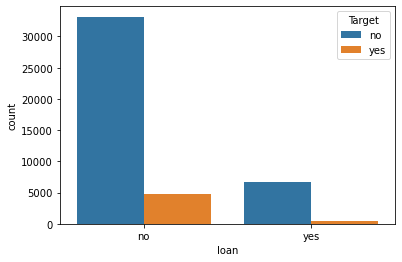

      TargetNum
loan           
no         0.13
yes        0.07


In [28]:
#Default, Housing, Loan, Target:
sns.countplot(bank['default'], hue=bank['Target']);
plt.show();
print(pd.pivot_table(bank,index=["default"],values=["TargetNum"]));


sns.countplot(bank['housing'], hue=bank['Target']);
plt.show();
print(pd.pivot_table(bank,index=["housing"],values=["TargetNum"]));


sns.countplot(bank['loan'], hue=bank['Target']);
plt.show();
print(pd.pivot_table(bank,index=["loan"],values=["TargetNum"]));



<span style="font-family: Verdana;font-size:1em;color:#E41414;"> ANALYSIS: 
Customers with any kind of sucessfull contact has more YES to target than "unknown"

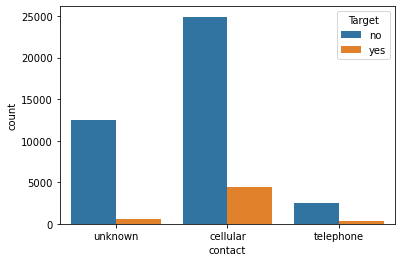

           TargetNum
contact             
cellular        0.15
telephone       0.13
unknown         0.04


In [29]:
sns.countplot(bank['contact'], hue=bank['Target']);
plt.show();
print(pd.pivot_table(bank,index=["contact"],values=["TargetNum"]));


<span style="font-family: Verdana;font-size:1em;color:#E41414;"> ANALYSIS: 

Customers with success from outcome campaings has more YES to target

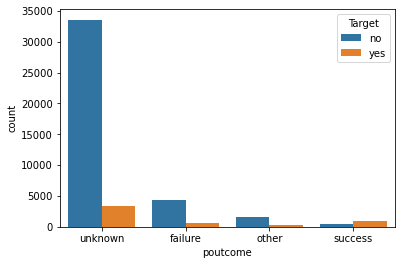



          TargetNum
poutcome           
failure        0.13
other          0.17
success        0.65
unknown        0.09


In [30]:
sns.countplot(bank['poutcome'], hue=bank['Target']);
plt.show();
print('\n')
print(pd.pivot_table(bank,index=["poutcome"],values=["TargetNum"]));


<span style="font-family: Verdana;font-size:1em;color:#E41414;"> ANALYSIS: 
    Longer duration calls has more targets (%)

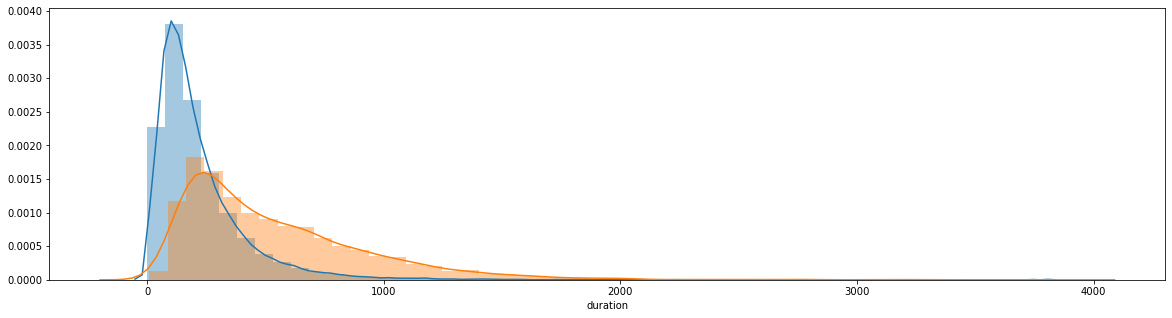

In [31]:
x = bank.loc[(bank['TargetNum'] == 0) & (bank['balance'] <= 5000)& (bank['balance'] > -1000)]
y = bank.loc[(bank['TargetNum'] == 1) & (bank['balance'] <= 5000)& (bank['balance'] > -1000)]

plt.figure(figsize=(20,5))
sns.distplot(x['duration'])
sns.distplot(y['duration'])
plt.show()
print('')

<span style="font-family: Verdana;font-size:1em;color:#E41414;"> ANALYSIS: 
Lower volume of calls on campaign has more targets equal to Yes(%)'

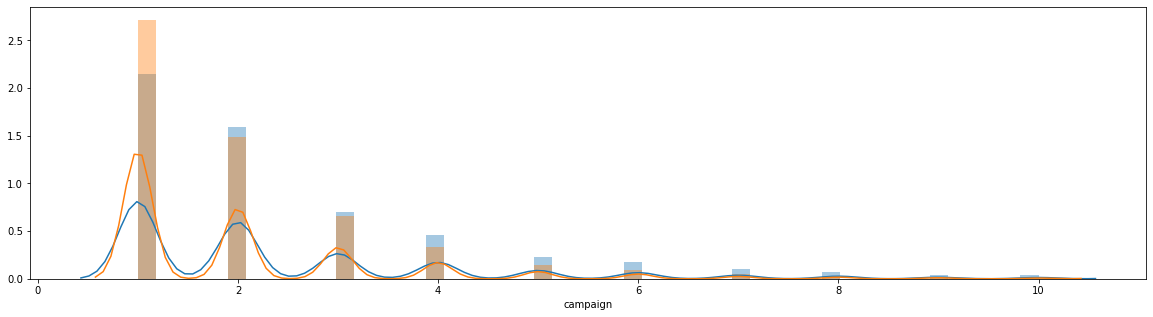

In [32]:
x = bank.loc[(bank['TargetNum'] == 0) & (bank['campaign'] <= 10)& (bank['campaign'] > 0)]
y = bank.loc[(bank['TargetNum'] == 1) & (bank['campaign'] <= 10)& (bank['campaign'] > 0)]

plt.figure(figsize=(20,5))
sns.distplot(x['campaign'])
sns.distplot(y['campaign'])
plt.show()

<span style="font-family: Verdana;font-size:1em;color:#E41414;"> ANALYSIS: 
Passed days after last contact on other campaigns shows better results to target in two moments:
    - from 75 to 115 days and 
    - from 175 to 200 days

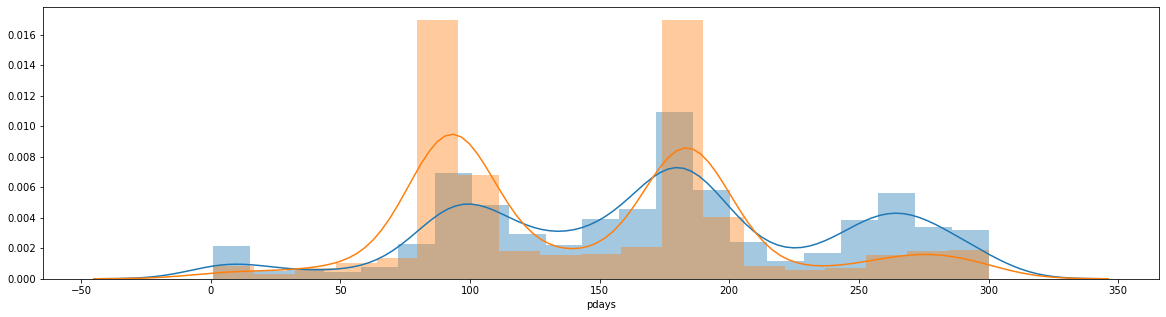

In [33]:
x = bank.loc[(bank['TargetNum'] == 0) & (bank['pdays'] <= 300)& (bank['pdays'] > 0)]
y = bank.loc[(bank['TargetNum'] == 1) & (bank['pdays'] <= 300)& (bank['pdays'] > 0)]

plt.figure(figsize=(20,5))
sns.distplot(x['pdays'])
sns.distplot(y['pdays'])
plt.show()

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<span style="font-family: Verdana;font-size:1.2em;color:#B22222;">  Deliverable 2 - Prepare the data for analytics

1. Ensure the attribute types are correct.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize 
4. Create the training set and test set in ratio of 70:30

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

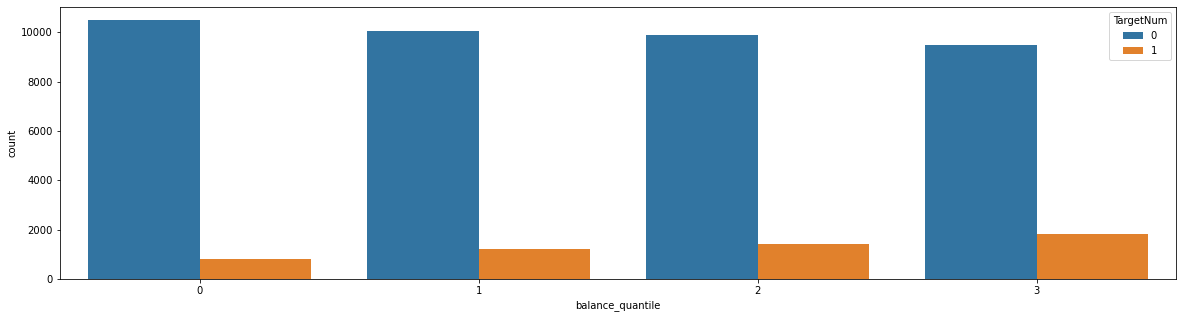

                    amin    amax
                 balance balance
balance_quantile                
0                  -8019      72
1                     73     448
2                    449    1428
3                   1429  102127
                  TargetNum
balance_quantile           
0                      0.07
1                      0.11
2                      0.13
3                      0.16

Major balances, major % of target


In [34]:
# Create a range for balance, based on quantiles:

bank['balance_quantile'] = pd.qcut(bank['balance'], 4, labels=False)
plt.figure(figsize=(20,5))

sns.countplot(bank['balance_quantile'], hue=bank['TargetNum']);
plt.show()

print(pd.pivot_table(bank,index=["balance_quantile"],values=["balance"], aggfunc=[np.min, np.max]));
print(pd.pivot_table(bank,index=["balance_quantile"],values=["TargetNum"]));

print('\nMajor balances, major % of target')



                  TargetNum
balance_negative           
False                  0.12
True                   0.06


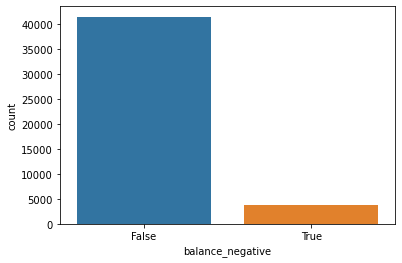

In [35]:
# Negative Balances has lower number of targets
bank['balance_negative'] = bank['balance']<0
print(pd.pivot_table(bank,index=["balance_negative"],values=["TargetNum"]));
sns.countplot(bank['balance_negative'])

                   TargetNum
balance_highrange           
False                   0.11
True                    0.17


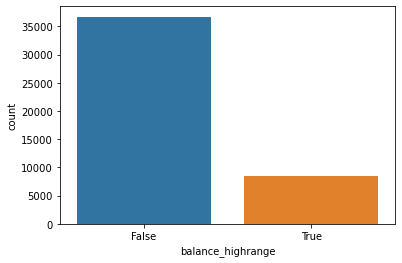

In [36]:
# High Balances has Upper number of targets
bank['balance_highrange'] = bank['balance']>2000
print(pd.pivot_table(bank,index=["balance_highrange"],values=["TargetNum"]));
sns.countplot(bank['balance_highrange'])


           TargetNum
age_young           
False           0.11
True            0.16


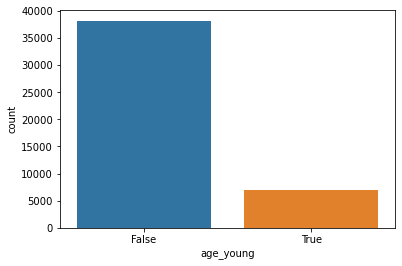

In [37]:
# Ages
bank['age_young'] = bank['age']<=30

print(pd.pivot_table(bank,index=["age_young"],values=["TargetNum"]));
sns.countplot(bank['age_young'])


         TargetNum
age_old           
False         0.11
True          0.17


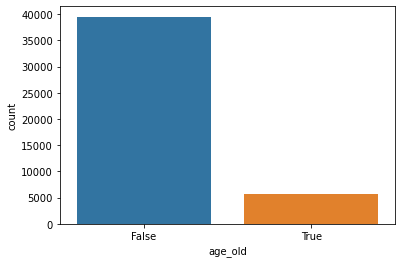

In [38]:
# Ages
bank['age_old'] = bank['age']>=55

print(pd.pivot_table(bank,index=["age_old"],values=["TargetNum"]));
sns.countplot(bank['age_old'])

In [39]:
#                  TargetNum
#job                     
#admin.              0.12
#blue-collar         0.07
#entrepreneur        0.08
#housemaid           0.09
#management          0.14
#retired             0.23
#self-employed       0.12
#services            0.09
#student             0.29
#technician          0.11
#unemployed          0.16
#unknown             0.12
# Jobs with more or less targets
top_jobs_list = ['retired','student','management']
bot_jobs_list = ['blue-collar','entrepreneur','services','housemaid']

bank['top_jobs'] = bank['job'].isin(top_jobs_list)
bank['bot_jobs'] = bank['job'].isin(bot_jobs_list)



In [40]:
bank.dtypes

age                   int64
job                  object
marital              object
education            object
default              object
balance               int64
housing              object
loan                 object
contact              object
day                   int64
month                object
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome             object
Target               object
TargetNum             int64
balance_quantile      int64
balance_negative       bool
balance_highrange      bool
age_young              bool
age_old                bool
top_jobs               bool
bot_jobs               bool
dtype: object

In [41]:
relevant_cols =(
                'job',       
                'marital',      
                'education',     
                'default',    
                'housing',   
                'loan',  
                'contact', 
                'poutcome',
                'balance_quantile',
                'balance_negative',
                'balance_highrange',
                'age_young',
                'age_old',
                'top_jobs',
                'bot_jobs',
                'TargetNum'
                )

dummies_cols =(
                'job',       
                'marital',      
                'education',     
                'default',    
                'housing',   
                'loan',  
                'contact', 
                'poutcome',
                'balance_quantile',
                'balance_negative',
                'balance_highrange',
                'age_young',
                'age_old',
                'top_jobs',
                'bot_jobs'
                )

bank_adjusted = bank.loc[:,relevant_cols]


print(bank_adjusted.dtypes)
bank_adjusted.head()

job                  object
marital              object
education            object
default              object
housing              object
loan                 object
contact              object
poutcome             object
balance_quantile      int64
balance_negative       bool
balance_highrange      bool
age_young              bool
age_old                bool
top_jobs               bool
bot_jobs               bool
TargetNum             int64
dtype: object


,job,marital,education,default,housing,loan,contact,poutcome,balance_quantile,balance_negative,balance_highrange,age_young,age_old,top_jobs,bot_jobs,TargetNum
0,management,married,tertiary,no,yes,no,unknown,unknown,3,False,True,False,True,True,False,0
1,technician,single,secondary,no,yes,no,unknown,unknown,0,False,False,False,False,False,False,0
2,entrepreneur,married,secondary,no,yes,yes,unknown,unknown,0,False,False,False,False,False,True,0
3,blue-collar,married,unknown,no,yes,no,unknown,unknown,3,False,False,False,False,False,True,0
4,unknown,single,unknown,no,no,no,unknown,unknown,0,False,False,False,False,False,False,0


In [42]:
bank_model = bank_adjusted.copy()
bank_model = bank_model.drop(['job'],axis=1)

#bank_model = pd.get_dummies(bank_model, columns=['job'])

bank_model['default'] = bank_model['default'].replace({'yes':1, 'no':0 })
bank_model['housing'] = bank_model['housing'].replace({'yes':1, 'no':0 })
bank_model['loan'] = bank_model['loan'].replace({'yes':1, 'no':0 })

bank_model['balance_negative'] = bank_model['balance_negative'].replace({True:0, False:1 })
bank_model['balance_highrange'] = bank_model['balance_highrange'].replace({True:1, False:0 })
bank_model['age_young'] = bank_model['age_young'].replace({True:1, False:0 })
bank_model['poutcome'] = bank_model['poutcome'].replace({'unknown':0, 'failure':1,'other':2,'success':3  })

bank_model['contact'] = bank_model['contact'].replace({'unknown':0, 'telephone':1,'cellular':2})

bank_model['marital'] = bank_model['marital'].replace({'married':0, 'divorced':1,'single':2})

bank_model['education'] = bank_model['education'].replace({'primary':0, 'secondary':1,'unknown':2,'tertiary':3  })

bank_model['age_old'] = bank_model['age_old'].replace({True:1, False:0 })
bank_model['top_jobs'] = bank_model['top_jobs'].replace({True:1, False:0 })
bank_model['bot_jobs'] = bank_model['bot_jobs'].replace({True:1, False:0 })



bank_model.dtypes





marital              int64
education            int64
default              int64
housing              int64
loan                 int64
contact              int64
poutcome             int64
balance_quantile     int64
balance_negative     int64
balance_highrange    int64
age_young            int64
age_old              int64
top_jobs             int64
bot_jobs             int64
TargetNum            int64
dtype: object

In [43]:
# splitting data into training and test set for independent attributes

features = [col for col in bank_model.columns if col != 'TargetNum']

X_train, X_test, y_train, y_test = train_test_split(bank_model[features], bank_model['TargetNum'], test_size=.3, random_state=22)
X_train.shape, X_test.shape

((31647, 14), (13564, 14))

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<span style="font-family: Verdana;font-size:1.2em;color:#B22222;">  Deliverable 3 - create the ensemble model
    

1. First create models using Logistic Regression and Decision Tree algorithm. 
Note the model performance by using different matrices. 
Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. 
Also reflect the accuracy and F1 score of the model. (10 marks)

2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<span style="font-family: Verdana;font-size:1.2em;color:#E41414;">  LOGISTIC REGRESSION MODEL

In [44]:
# Fit the model on train using sklearn
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)


     0    1     2     3     4    5    6    7    8    9   10   11   12    13  \
0 0.15 0.03 -0.07 -0.68 -0.43 0.40 0.63 0.17 0.02 0.09 0.38 0.38 0.16 -0.12   

   intercept  
0      -3.16  


Text(0.5, 24.0, 'Predicted label')

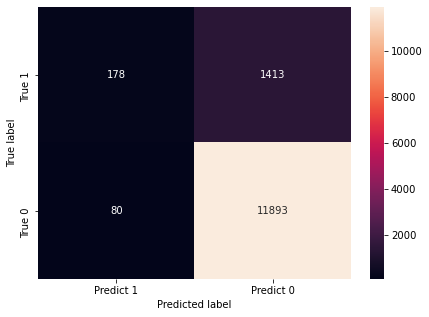

In [45]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["True 1","True 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [46]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
    
print("\nTrainig accuracy",round(model.score(X_train,y_train),3))

print("\nTesting accuracy",round(model.score(X_test, y_test),3))


print("\nRecall:",round(recall_score(y_test,y_predict),2))

print("\nPrecision:",round(precision_score(y_test,y_predict),2))

print("\nF1 Score:",round(f1_score(y_test,y_predict),2))

print("\nRoc Auc Score:",round(roc_auc_score(y_test,y_predict),2))


lr_result = ((model.score(X_train,y_train)),
             (model.score(X_test, y_test)),
             (recall_score(y_test,y_predict)),
             (precision_score(y_test,y_predict)),
             (f1_score(y_test,y_predict)),
             (roc_auc_score(y_test,y_predict)))


Trainig accuracy 0.89

Testing accuracy 0.89

Recall: 0.11

Precision: 0.69

F1 Score: 0.19

Roc Auc Score: 0.55


In [47]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)
print()
print('No changes on solver type changing for l2')


['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.89, 0.89, 0.89, 0.89, 0.89]

[0.89, 0.89, 0.89, 0.89, 0.89]

No changes on solver type changing for l2


In [48]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)
print()
print('No changes on solver type changing for l1')

['liblinear', 'saga']

[0.89, 0.89]

[0.89, 0.89]

No changes on solver type changing for l1


In [49]:
#Build the logistic regression model
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.315011
         Iterations 7


In [50]:
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:              TargetNum   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31632
Method:                           MLE   Df Model:                           14
Date:                Thu, 30 Jul 2020   Pseudo R-squ.:                  0.1264
Time:                        16:17:22   Log-Likelihood:                -9969.1
converged:                       True   LL-Null:                       -11412.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.1944      0.112    -28.421      0.000      -3.415      -2.974
marital               0.1494      0.023      6.576      0.000       0.105       0.194
education             0.

In [51]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
print("")
print("Good coefs - Pvalue <= 0.1 ")
print("")
pval_filter = lgcoef['pval']<=0.1
print(lgcoef[pval_filter])
print("")
print("Bad coefs - Pvalue > 0.1 ")
print("")
pval_filter2 = lgcoef['pval']>.10
print(lgcoef[pval_filter2])


Good coefs - Pvalue <= 0.1 

                  coef  Odds_ratio  probability  pval
poutcome          0.63        1.88         0.65  0.00
contact           0.41        1.50         0.60  0.00
age_old           0.39        1.47         0.60  0.00
age_young         0.38        1.46         0.59  0.00
balance_quantile  0.17        1.19         0.54  0.00
top_jobs          0.16        1.17         0.54  0.00
marital           0.15        1.16         0.54  0.00
bot_jobs         -0.11        0.89         0.47  0.02
loan             -0.43        0.65         0.39  0.00
housing          -0.68        0.51         0.34  0.00
const            -3.19        0.04         0.04  0.00

Bad coefs - Pvalue > 0.1 

                   coef  Odds_ratio  probability  pval
balance_highrange  0.10        1.10         0.52  0.10
balance_negative   0.05        1.05         0.51  0.62
education          0.03        1.03         0.51  0.16
default           -0.06        0.94         0.49  0.75


In [52]:
# remove not relevant variables

bank_model2 = bank_model.drop(['balance_highrange','balance_negative','education','default'],axis=1)
bank_model2.head()

,marital,housing,loan,contact,poutcome,balance_quantile,age_young,age_old,top_jobs,bot_jobs,TargetNum
0,0,1,0,0,0,3,0,1,1,0,0
1,2,1,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,1,0
3,0,1,0,0,0,3,0,0,0,1,0
4,2,0,0,0,0,0,0,0,0,0,0


In [53]:
# splitting data into training and test set for independent attributes

features2 = [col for col in bank_model2.columns if col != 'TargetNum']

X_train2, X_test2, y_train2, y_test2 = train_test_split(bank_model2[features2], bank_model2['TargetNum'], test_size=.3, random_state=22)
X_train2.shape, X_test2.shape

((31647, 10), (13564, 10))

In [54]:
train_score=[]
test_score=[]
model2 = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver='liblinear') 
model2.fit(X_train2, y_train2) 
y_predict2 = model2.predict(X_test2)     
train_score.append(round(model2.score(X_train2, y_train2),3))
test_score.append(round(model2.score(X_test2, y_test2),3))
    
print(train_score)
print()
print(test_score)
print()

[0.89]

[0.89]



LAST RESULTS:

Trainig accuracy 0.89

Testing accuracy 0.89

Recall: 0.11

Precision: 0.69

F1 Score: 0.19

Roc Auc Score: 0.55

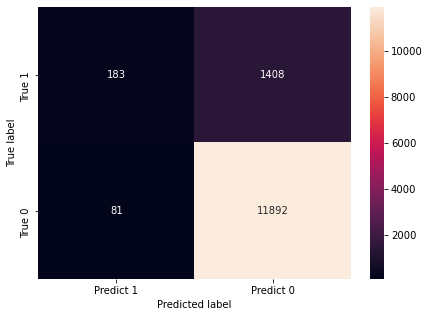

In [55]:
cm=metrics.confusion_matrix(y_test2, y_predict2, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["True 1","True 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [56]:
print("\nACTUAL RESULTS")
print("\nTrainig accuracy",round(model2.score(X_train2,y_train2),3))

print("\nTesting accuracy",round(model2.score(X_test2, y_test2),3))


print("\nRecall:",round(recall_score(y_test2,y_predict2),2))

print("\nPrecision:",round(precision_score(y_test2,y_predict2),2))

print("\nF1 Score:",round(f1_score(y_test2,y_predict2),2))

print("\nRoc Auc Score:",round(roc_auc_score(y_test2,y_predict2),2))

print("\nLittle increase on F1 score using only the most relevant variables.")
print("\nLittle increase on TRUE1/ PREDICT1 on confusion matriz (from 178 to 183)\n\n\n")


lr2_result = ((model2.score(X_train2,y_train2)),
             (model2.score(X_test2, y_test2)),
             (recall_score(y_test2,y_predict2)),
             (precision_score(y_test2,y_predict2)),
             (f1_score(y_test2,y_predict2)),
             (roc_auc_score(y_test2,y_predict2)))




ACTUAL RESULTS

Trainig accuracy 0.89

Testing accuracy 0.89

Recall: 0.12

Precision: 0.69

F1 Score: 0.2

Roc Auc Score: 0.55

Little increase on F1 score using only the most relevant variables.

Little increase on TRUE1/ PREDICT1 on confusion matriz (from 178 to 183)





<span style="font-family: Verdana;font-size:1.2em;color:#E41414;">  DECISION TREE

In [57]:
print(bank_model2.columns)

Index(['marital', 'housing', 'loan', 'contact', 'poutcome', 'balance_quantile',
       'age_young', 'age_old', 'top_jobs', 'bot_jobs', 'TargetNum'],
      dtype='object')


In [58]:
# splitting data into training and test set for independent attributes

features3 = [col for col in bank_model2.columns if col != 'TargetNum']
X_train3, X_test3, y_train3, y_test3 = train_test_split(bank_model2[features3], bank_model2['TargetNum'], test_size=.3, random_state=22)
X_train3.shape, X_test3.shape

((31647, 10), (13564, 10))

In [59]:
dTreeR = DecisionTreeClassifier(criterion = 'gini',  random_state=1, max_depth = 3) 
dTreeR.fit(X_train3, y_train3)
print(dTreeR.score(X_train3, y_train3))
print(dTreeR.score(X_test3, y_test3))

0.8930072360729295
0.8928044824535535


In [60]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train3), class_names = list(train_char_label))
Credit_Tree_FileR.close()

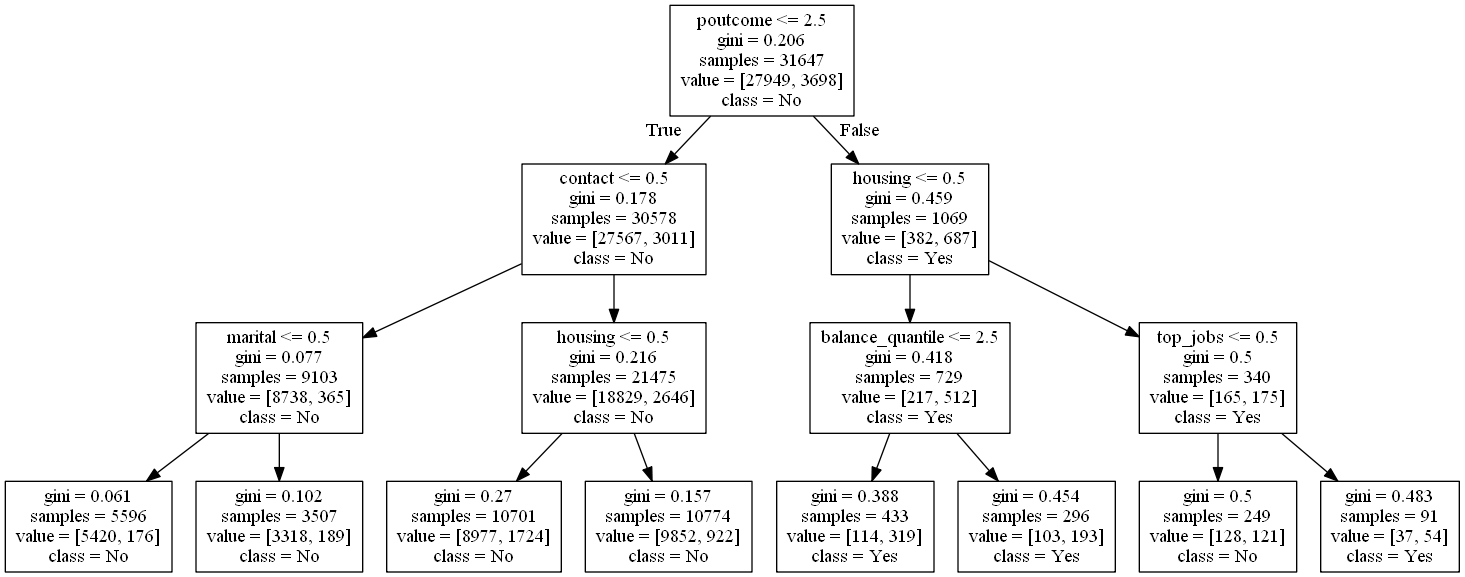

In [61]:
retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))


In [62]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train3.columns))

                  Imp
marital          0.00
housing          0.10
loan             0.00
contact          0.11
poutcome         0.78
balance_quantile 0.00
age_young        0.00
age_old          0.00
top_jobs         0.00
bot_jobs         0.00


In [63]:
#USING ONLY IMPORTANCES

In [64]:
# splitting data into training and test set for independent attributes

features4 = ['poutcome','contact','housing']
X_train4, X_test4, y_train4, y_test4 = train_test_split(bank_model2[features4], bank_model2['TargetNum'], test_size=.3, random_state=22)
X_train4.shape, X_test4.shape

((31647, 3), (13564, 3))

In [65]:
dTreeR = DecisionTreeClassifier(criterion = 'gini',  random_state=1, max_depth = 3) 
dTreeR.fit(X_train4, y_train4)
print(dTreeR.score(X_train4, y_train4))
print(dTreeR.score(X_test4, y_test4))

print('using only the main collumns there is no impact in scores from test and train data, compared to full model')

0.8929124403576958
0.8931731052786789
using only the main collumns there is no impact in scores from test and train data, compared to full model


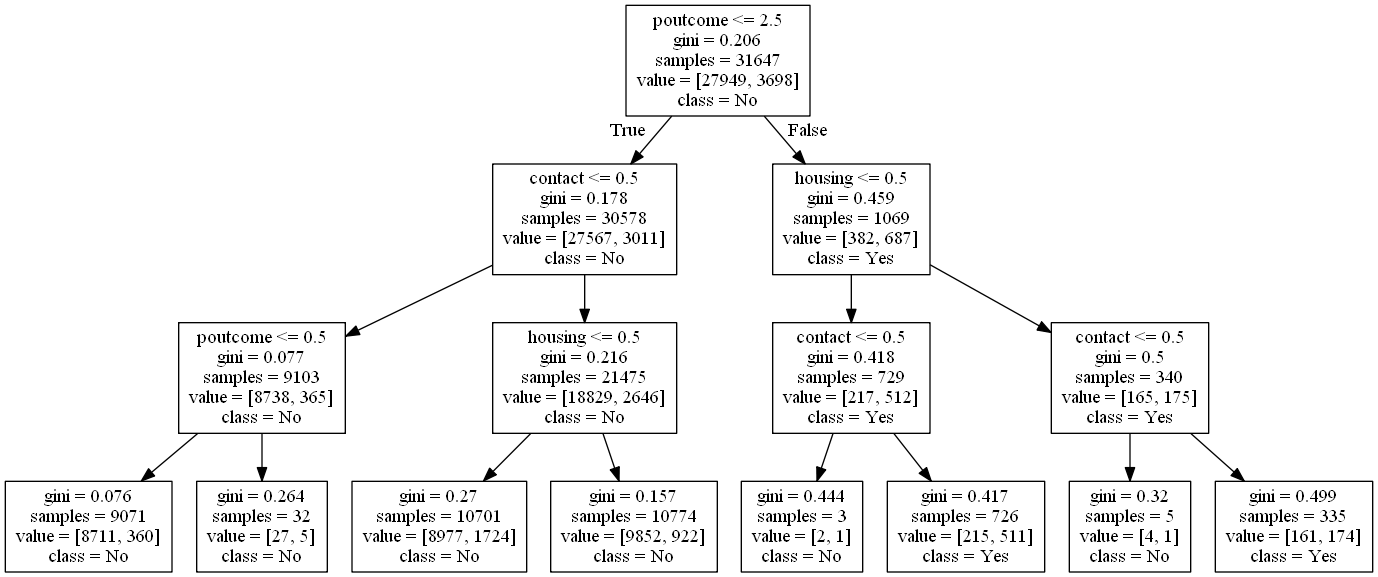

In [66]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train4), class_names = list(train_char_label))
Credit_Tree_FileR.close()
retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))

0.8931731052786789


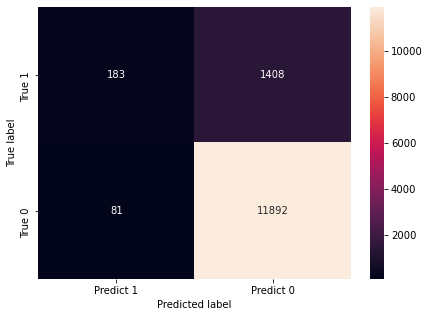

In [67]:
y_predict4 = dTreeR.predict(X_test4)

print(dTreeR.score(X_test4 , y_test4))

df_cm = pd.DataFrame(cm, index = [i for i in ["True 1","True 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [68]:
print("\nDECISION TREE RESULTS")
print("\nTrainig accuracy",round(dTreeR.score(X_train4,y_train4),3))

print("\nTesting accuracy",round(dTreeR.score(X_test4, y_test4),3))


print("\nRecall:",round(recall_score(y_test4,y_predict4),2))

print("\nPrecision:",round(precision_score(y_test4,y_predict4),2))

print("\nF1 Score:",round(f1_score(y_test4,y_predict4),2))

print("\nRoc Auc Score:",round(roc_auc_score(y_test4,y_predict4),2))


dtree_result = ((dTreeR.score(X_train4,y_train4)),
             (dTreeR.score(X_test4, y_test4)),
             (recall_score(y_test4,y_predict4)),
             (precision_score(y_test4,y_predict4)),
             (f1_score(y_test4,y_predict4)),
             (roc_auc_score(y_test4,y_predict4)))



DECISION TREE RESULTS

Trainig accuracy 0.893

Testing accuracy 0.893

Recall: 0.18

Precision: 0.66

F1 Score: 0.29

Roc Auc Score: 0.58


<span style="font-family: Verdana;font-size:1.2em;color:#E41414;">  ENSEMBLE METHOD

### 1. BAGGING

In [69]:
# splitting data into training and test set for independent attributes

features5 =  [col for col in bank_model2.columns if col != 'TargetNum']
X_train5, X_test5, y_train5, y_test5 = train_test_split(bank_model2[features5], bank_model2['TargetNum'], test_size=.3, random_state=22)
X_train5.shape, X_test5.shape

((31647, 10), (13564, 10))

In [70]:
bgcl = BaggingClassifier(base_estimator=dTreeR, n_estimators=50,random_state=1, max_samples= .3, bootstrap=True)
bgcl = bgcl.fit(X_train5, y_train5)

0.893246829843704


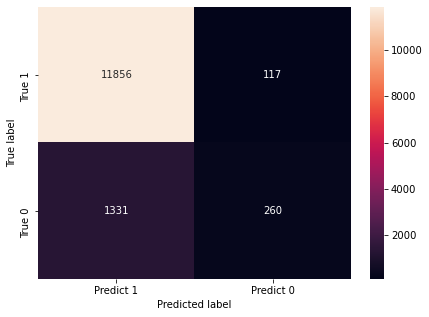

In [71]:
y_predict5 = bgcl.predict(X_test5)

print(bgcl.score(X_test5 , y_test5))

cm=metrics.confusion_matrix(y_test5, y_predict5,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["True 1","True 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [72]:
print("\nBAGGING RESULTS")
print("\nTrainig accuracy",round(bgcl.score(X_train5,y_train5),3))

print("\nTesting accuracy",round(bgcl.score(X_test5, y_test5),3))


print("\nRecall:",round(recall_score(y_test5,y_predict5),2))

print("\nPrecision:",round(precision_score(y_test5,y_predict5),2))

print("\nF1 Score:",round(f1_score(y_test5,y_predict5),2))

print("\nRoc Auc Score:",round(roc_auc_score(y_test5,y_predict5),2))


bgcl_result = ((bgcl.score(X_train5,y_train5)),
             (bgcl.score(X_test5, y_test5)),
             (recall_score(y_test5,y_predict5)),
             (precision_score(y_test5,y_predict5)),
             (f1_score(y_test5,y_predict5)),
             (roc_auc_score(y_test5,y_predict5)))


BAGGING RESULTS

Trainig accuracy 0.893

Testing accuracy 0.893

Recall: 0.16

Precision: 0.69

F1 Score: 0.26

Roc Auc Score: 0.58


### 2. AdaBoosting

In [73]:
# splitting data into training and test set for independent attributes

features6 =  [col for col in bank_model2.columns if col != 'TargetNum']
X_train6, X_test6, y_train6, y_test6 = train_test_split(bank_model2[features6], bank_model2['TargetNum'], test_size=.3, random_state=22)
X_train6.shape, X_test6.shape

((31647, 10), (13564, 10))

In [74]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train6, y_train6)

0.8918460631082277


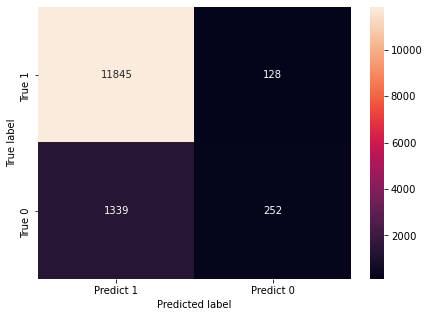

In [75]:
y_predict6 = abcl.predict(X_test6)
print(abcl.score(X_test6 , y_test6))

cm=metrics.confusion_matrix(y_test6, y_predict6,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["True 1","True 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [76]:
print("\nAdaBoosting RESULTS")
print("\nTrainig accuracy",round(abcl.score(X_train6,y_train6),3))

print("\nTesting accuracy",round(abcl.score(X_test6, y_test6),3))


print("\nRecall:",round(recall_score(y_test6,y_predict6),2))

print("\nPrecision:",round(precision_score(y_test6,y_predict6),2))

print("\nF1 Score:",round(f1_score(y_test6,y_predict6),2))

print("\nRoc Auc Score:",round(roc_auc_score(y_test6,y_predict6),2))


abcl_result = ((abcl.score(X_train6,y_train6)),
             (abcl.score(X_test6, y_test6)),
             (recall_score(y_test6,y_predict6)),
             (precision_score(y_test6,y_predict6)),
             (f1_score(y_test6,y_predict6)),
             (roc_auc_score(y_test6,y_predict6)))



AdaBoosting RESULTS

Trainig accuracy 0.893

Testing accuracy 0.892

Recall: 0.16

Precision: 0.66

F1 Score: 0.26

Roc Auc Score: 0.57


### 3. GradientBoost

In [77]:
# splitting data into training and test set for independent attributes

features7 =  [col for col in bank_model2.columns if col != 'TargetNum']
X_train7, X_test7, y_train7, y_test7 = train_test_split(bank_model2[features7], bank_model2['TargetNum'], test_size=.3, random_state=22)
X_train7.shape, X_test7.shape

((31647, 10), (13564, 10))

In [78]:
gbcl = GradientBoostingClassifier(n_estimators=150,learning_rate = 0.05)
gbcl = gbcl.fit(X_train7, y_train7)

0.8931731052786789


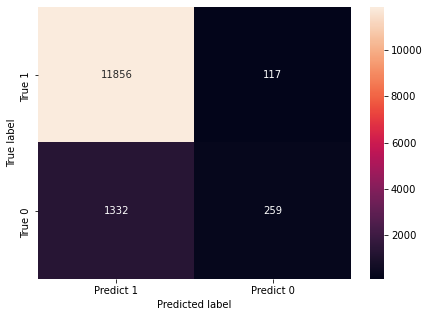

In [79]:
y_predict7 = gbcl.predict(X_test7)
print(gbcl.score(X_test7 , y_test7))

cm=metrics.confusion_matrix(y_test7, y_predict7,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["True 1","True 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [80]:
print("\nGradientBoost RESULTS")
print("\nTrainig accuracy",round(gbcl.score(X_train7,y_train7),3))

print("\nTesting accuracy",round(gbcl.score(X_test7, y_test7),3))


print("\nRecall:",round(recall_score(y_test7,y_predict7),2))

print("\nPrecision:",round(precision_score(y_test7,y_predict7),2))

print("\nF1 Score:",round(f1_score(y_test7,y_predict7),2))

print("\nRoc Auc Score:",round(roc_auc_score(y_test7,y_predict7),2))


gbcl_result = ((gbcl.score(X_train7,y_train7)),
             (gbcl.score(X_test7, y_test7)),
             (recall_score(y_test7,y_predict7)),
             (precision_score(y_test7,y_predict7)),
             (f1_score(y_test7,y_predict7)),
             (roc_auc_score(y_test7,y_predict7)))



GradientBoost RESULTS

Trainig accuracy 0.894

Testing accuracy 0.893

Recall: 0.16

Precision: 0.69

F1 Score: 0.26

Roc Auc Score: 0.58


### 4. RandomForest Classifier

In [81]:
# splitting data into training and test set for independent attributes

features8 =  [col for col in bank_model2.columns if col != 'TargetNum']
X_train8, X_test8, y_train8, y_test8 = train_test_split(bank_model2[features8], bank_model2['TargetNum'], test_size=.3, random_state=22)
X_train8.shape, X_test8.shape

((31647, 10), (13564, 10))

In [82]:
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 7, min_samples_leaf=5)
rfcl = rfcl.fit(X_train8, y_train8)

0.8928044824535535


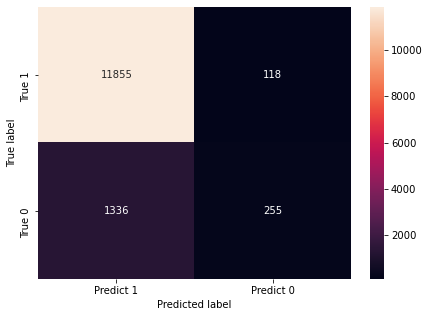

In [83]:
y_predict8 = rfcl.predict(X_test8)
print(rfcl.score(X_test8 , y_test8))

cm=metrics.confusion_matrix(y_test8, y_predict8,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["True 1","True 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [84]:
print("\nRandomForest Classifier RESULTS")
print("\nTrainig accuracy",round(rfcl.score(X_train8,y_train8),3))

print("\nTesting accuracy",round(rfcl.score(X_test8, y_test8),3))


print("\nRecall:",round(recall_score(y_test8,y_predict8),2))

print("\nPrecision:",round(precision_score(y_test8,y_predict8),2))

print("\nF1 Score:",round(f1_score(y_test8,y_predict8),2))

print("\nRoc Auc Score:",round(roc_auc_score(y_test8,y_predict8),2))

rfcl_result = ((rfcl.score(X_train8,y_train8)),
             (rfcl.score(X_test8, y_test8)),
             (recall_score(y_test8,y_predict8)),
             (precision_score(y_test8,y_predict8)),
             (f1_score(y_test8,y_predict8)),
             (roc_auc_score(y_test8,y_predict8)))





RandomForest Classifier RESULTS

Trainig accuracy 0.894

Testing accuracy 0.893

Recall: 0.16

Precision: 0.68

F1 Score: 0.26

Roc Auc Score: 0.58


In [85]:
results = pd.DataFrame(np.array([
                                rfcl_result,
                                gbcl_result,
                                abcl_result,
                                bgcl_result,
                                dtree_result,
                                lr2_result,
                                lr_result]),
                       columns=['train_score', 'test_score', 'recall','precision','f1_score','roc_auc_score'],
                       index=['Random Forests', 'Gradient Boosting', 'ADA Boosting','Bagging','Decisiton Tree','LogisticReg2','LogisticReg1']
                      )
results*100

,train_score,test_score,recall,precision,f1_score,roc_auc_score
Random Forests,89.42,89.28,16.03,68.36,25.97,57.52
Gradient Boosting,89.35,89.32,16.28,68.88,26.33,57.65
ADA Boosting,89.26,89.18,15.84,66.32,25.57,57.39
Bagging,89.34,89.32,16.34,68.97,26.42,57.68
Decisiton Tree,89.29,89.32,18.23,66.21,28.59,58.50
LogisticReg2,88.99,89.02,11.50,69.32,19.73,55.41
LogisticReg1,89.01,88.99,11.19,68.99,19.25,55.26


<span style="font-family: Verdana;font-size:1.2em;color:#E41414;">  CONCLUSION

In [87]:
results*100

,train_score,test_score,recall,precision,f1_score,roc_auc_score
Random Forests,89.42,89.28,16.03,68.36,25.97,57.52
Gradient Boosting,89.35,89.32,16.28,68.88,26.33,57.65
ADA Boosting,89.26,89.18,15.84,66.32,25.57,57.39
Bagging,89.34,89.32,16.34,68.97,26.42,57.68
Decisiton Tree,89.29,89.32,18.23,66.21,28.59,58.50
LogisticReg2,88.99,89.02,11.50,69.32,19.73,55.41
LogisticReg1,89.01,88.99,11.19,68.99,19.25,55.26


<span style="font-family: Verdana;font-size:1.0em;color:#006699;">First of all, do a good work on treatment of variables is necessary for good models.
    
<span style="font-family: Verdana;font-size:1.0em;color:#006699;">Arranging, extract more information than the simple value and choice the good ones informations to use to each model is really nacessary and changes bottom line result.
    
<span style="font-family: Verdana;font-size:1.0em;color:#006699;"> 
The best model i see is the Gradient Boosting one, as it:
    
<span style="font-family: Verdana;font-size:1.0em;color:#006699;">    - Reaches a great train and test score (near results - wich is good);
    
<span style="font-family: Verdana;font-size:1.0em;color:#006699;">   - It has a good recall vs precison balance;
    
<span style="font-family: Verdana;font-size:1.0em;color:#006699;">   - great results from f1 score and roc auc.
    
<span style="font-family: Verdana;font-size:1.0em;color:#006699;"> 
By the way, all ensemble models gives better results than logistic regression, with low distorcions and performance increasing on comparison from one to other.